In [2]:
print("Project workbook")

Project workbook


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\18005\\OneDrive\\Documents\\GitHub\\Project3-Traffic-Jam\\project\\train_revised.csv")

In [5]:
df = df.drop(columns=["seat_number", "ride_id", "payment_receipt", "travel_date", "max_capacity","payment_method"])
df = df[(df.travel_to == 'Nairobi') & (df.car_type == 'Bus')]
df = df.drop(columns = ["travel_to","car_type"])
df = df.drop_duplicates()

In [6]:
df

,travel_time,travel_from
0,7:15,Migori
1,7:12,Migori
2,7:05,Keroka
3,7:10,Homa Bay
9,7:09,Homa Bay
...,...,...
48055,7:05,Ndhiwa
48327,7:10,Rodi
49796,23:09,Nyachenge
51299,5:00,Kisii


In [7]:
#Check frequency
df.travel_time.value_counts(normalize = True)

7:08     0.064516
7:13     0.056452
7:04     0.056452
7:05     0.056452
8:00     0.048387
7:00     0.048387
7:15     0.048387
7:12     0.048387
7:09     0.048387
7:10     0.040323
7:02     0.040323
7:14     0.040323
7:11     0.040323
19:07    0.040323
7:03     0.040323
6:59     0.040323
7:07     0.032258
23:10    0.032258
19:06    0.024194
19:03    0.024194
23:09    0.024194
19:04    0.024194
19:05    0.024194
7:06     0.024194
7:01     0.016129
5:00     0.008065
5:10     0.008065
Name: travel_time, dtype: float64

In [8]:
df.travel_from.value_counts(normalize = True)

Kisii        0.201613
Rongo        0.137097
Keroka       0.137097
Kijauri      0.096774
Nyachenge    0.088710
Awendo       0.064516
Migori       0.064516
Rodi         0.048387
Homa Bay     0.032258
Sirare       0.024194
Keumbu       0.024194
Kehancha     0.016129
Mbita        0.016129
Sori         0.016129
Ndhiwa       0.016129
Oyugis       0.008065
Kendu Bay    0.008065
Name: travel_from, dtype: float64

C:\Users\18005\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='travel_time', ylabel='count'>

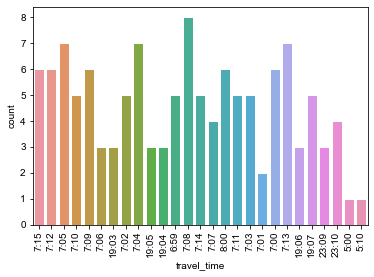

In [10]:
import matplotlib.pylab as plt
import seaborn as sns
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(df.travel_time)

C:\Users\18005\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='travel_from', ylabel='count'>

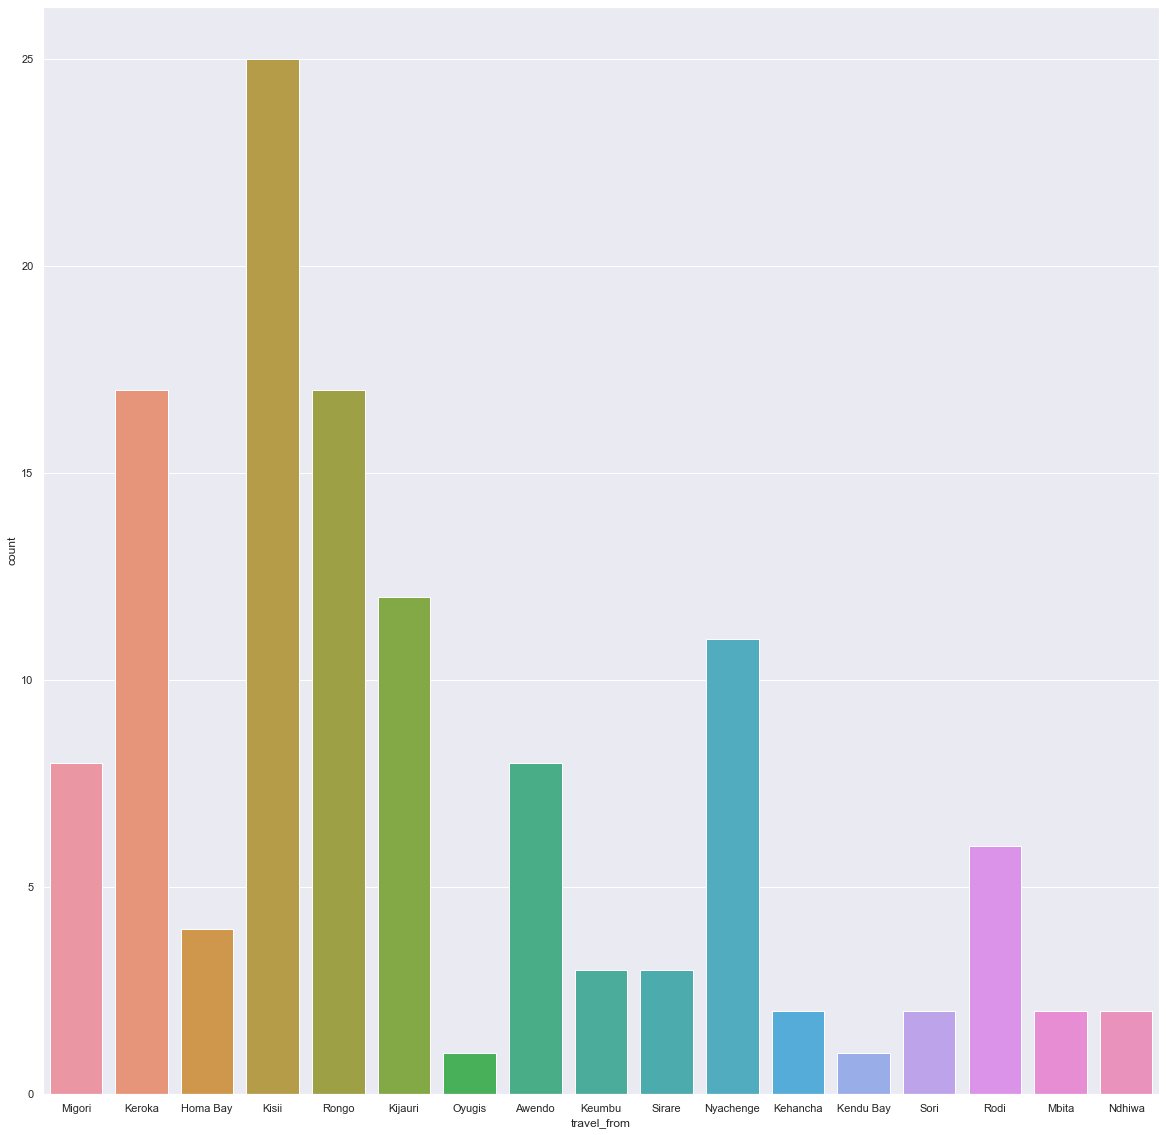

In [11]:
sns.countplot(df.travel_from)

In [12]:
#Check missing 
df.isna().sum()/df.shape[0]

travel_time    0.0
travel_from    0.0
dtype: float64

In [18]:
#define groups
morning = ['7:15','7:12','7:05','7:10','7:09','7:02','7:04','7:08','7:07','8:00','7:11','7:03','7:01','7:00','7:13']
afternoon = ['5:00','5:10']
evening = ['19:03','19:05','19:04','19:06','19:07']
night = ['23:09','23:10']

df.loc[df['travel_time'].isin(morning), 
             'travel_time_type'] = 'morning'
df.loc[df['travel_time'].isin(afternoon), 
             'travel_time_type'] = 'afternoon'
df.loc[df['travel_time'].isin(evening), 
             'travel_time_type'] = 'evening'
df.loc[df['travel_time'].isin(night), 
             'travel_time_type'] = 'night'

df
#Pretty sure there is a smarter way to group data maybe with regex? 

,travel_time,travel_from,travel_time_type
0,7:15,Migori,morning
1,7:12,Migori,morning
2,7:05,Keroka,morning
3,7:10,Homa Bay,morning
9,7:09,Homa Bay,morning
...,...,...,...
48055,7:05,Ndhiwa,morning
48327,7:10,Rodi,morning
49796,23:09,Nyachenge,night
51299,5:00,Kisii,afternoon


In [21]:
df.travel_time_type.value_counts(normalize = True)

morning      0.765766
evening      0.153153
night        0.063063
afternoon    0.018018
Name: travel_time_type, dtype: float64

C:\Users\18005\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='travel_time_type', ylabel='count'>

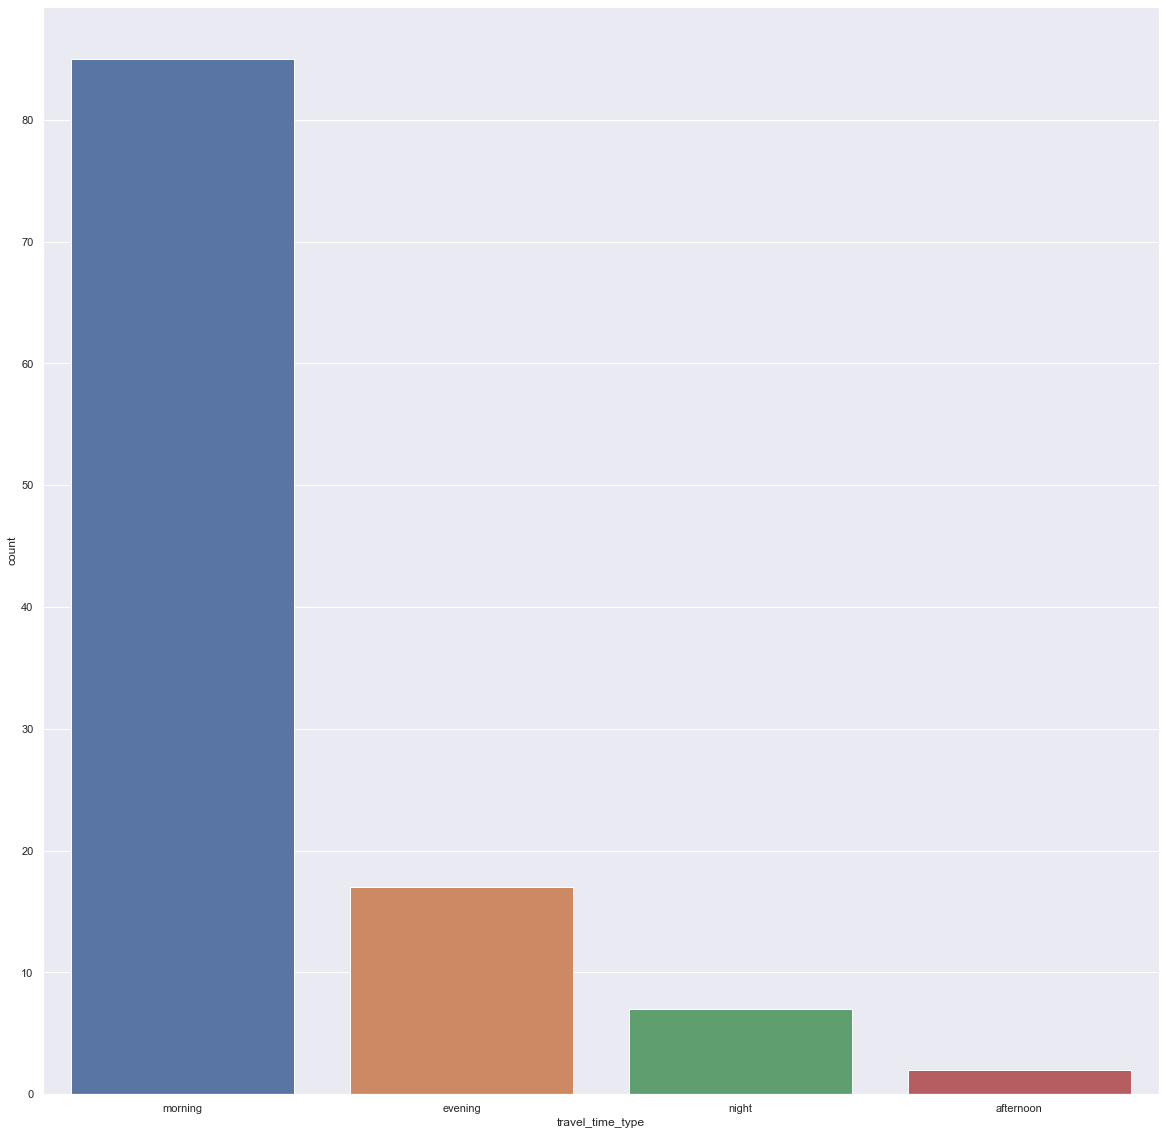

In [22]:
sns.countplot(df.travel_time_type)

In [23]:
df.travel_time_type = df.travel_time_type.astype("category")
df.travel_time_type.dtype

CategoricalDtype(categories=['afternoon', 'evening', 'morning', 'night'], ordered=False)

In [25]:
#relationship
time_by_area = pd.crosstab(df.travel_from,df.travel_time_type)
time_by_area

travel_time_type,afternoon,evening,morning,night
travel_from,,,,
Awendo,0,1,6,0
Homa Bay,0,0,4,0
Kehancha,0,0,2,0
Kendu Bay,0,0,1,0
Keroka,0,4,11,0
Keumbu,0,0,3,0
Kijauri,0,4,6,0
Kisii,2,5,15,0
Mbita,0,0,1,1


<AxesSubplot:xlabel='travel_time_type', ylabel='travel_from'>

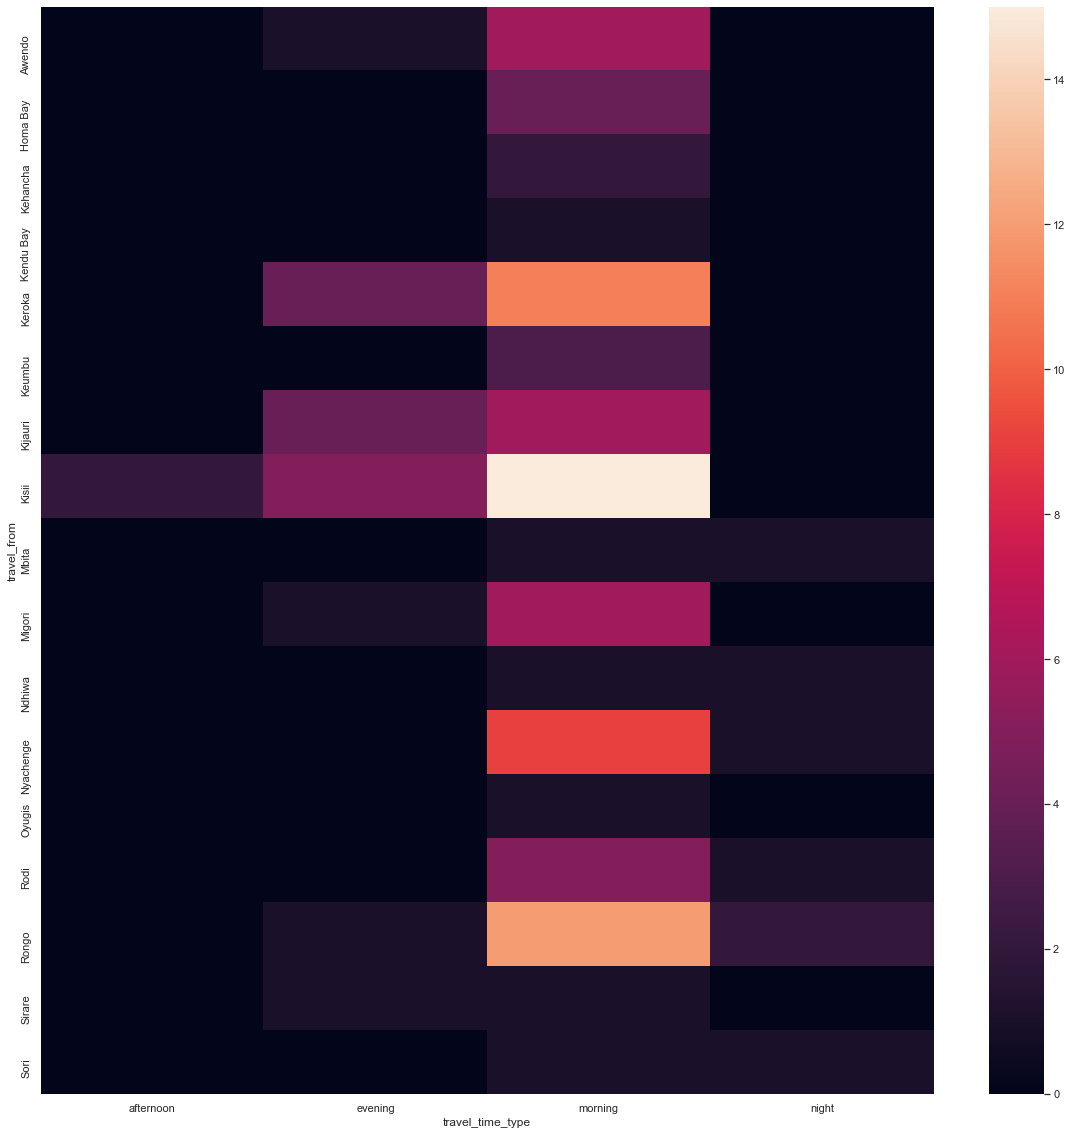

In [26]:
sns.heatmap(time_by_area)